# EDA
- 불필요한 컬럼 제거
- 데이터 타입 변경
- 결측치 제거
- 이상치 제거

In [34]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [35]:
import pandas as pd

df = pd.read_csv('vgames2.csv')

In [36]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


불필요한 컬럼 제거

In [37]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [38]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


결측치 제거

In [39]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [40]:
df_clean = df.copy()

In [41]:
df_clean = df_clean.dropna(subset=['Year'])
df_clean = df_clean.dropna(subset=['Genre'])
df_clean = df_clean.dropna(subset=['Publisher'])
df_clean.reset_index(drop=True, inplace=True)

In [42]:
df_clean.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

중복 데이터 확인

In [43]:
df_clean.duplicated().sum()

0

In [44]:
# 'Year' 컬럼 데이터 타입 변경
df_clean['Year'] = df_clean['Year'].astype(int)

In [45]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [46]:
# 단위 M 제거
df_clean.NA_Sales = df_clean.NA_Sales.str.replace('M','')
df_clean.EU_Sales = df_clean.EU_Sales.str.replace('M','')
df_clean.JP_Sales = df_clean.JP_Sales.str.replace('M','')
df_clean.Other_Sales = df_clean.Other_Sales.str.replace('M','')

In [47]:
# 단위 K 제거
ns_change = df_clean.loc[df_clean.NA_Sales.str.contains('K')].NA_Sales.str.replace('K','').astype(float) * 0.001
es_change = df_clean.loc[df_clean.EU_Sales.str.contains('K')].EU_Sales.str.replace('K','').astype(float) * 0.001
js_change = df_clean.loc[df_clean.JP_Sales.str.contains('K')].JP_Sales.str.replace('K','').astype(float) * 0.001
os_change = df_clean.loc[df_clean.Other_Sales.str.contains('K')].Other_Sales.str.replace('K','').astype(float) * 0.001

In [48]:
df_clean['NA_Sales'].loc[df_clean.NA_Sales.str.contains('K')] = ns_change
df_clean['EU_Sales'].loc[df_clean.EU_Sales.str.contains('K')] = es_change
df_clean['JP_Sales'].loc[df_clean.JP_Sales.str.contains('K')] = js_change
df_clean['Other_Sales'].loc[df_clean.Other_Sales.str.contains('K')] = os_change

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [49]:
df_clean = df_clean.astype({'NA_Sales':'float', 'EU_Sales':'float', 'JP_Sales':'float', 'Other_Sales':'float'})

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [51]:
df_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,1994.178437,0.265195,0.147378,0.078283,0.048234
std,155.484265,0.822431,0.508340,0.309272,0.189678
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [52]:
df_clean_year = df_clean.copy()

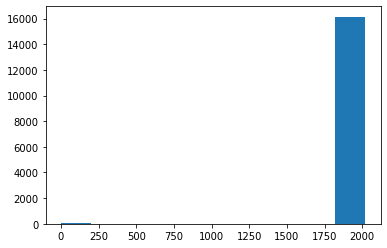

In [57]:
import matplotlib.pyplot as plt

plt.hist(df_clean_year.Year);

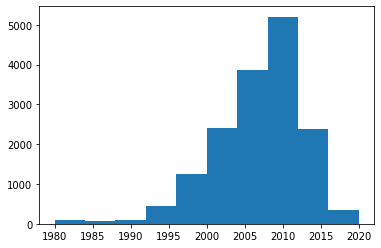

In [58]:
plt.hist(df_clean_year.Year[df_clean_year.Year > 1750]);

In [59]:
below_1750 = df_clean_year[df_clean_year.Year <= 1750]
above_1750 = df_clean_year[df_clean_year.Year > 1750]

In [60]:
len(below_1750), len(above_1750)

(100, 16141)

In [61]:
len(below_1750) / len(above_1750)

0.006195403010965863

In [62]:
df_clean_year = df_clean_year.drop(index = df_clean_year[df_clean_year.Year <= 1750].index)

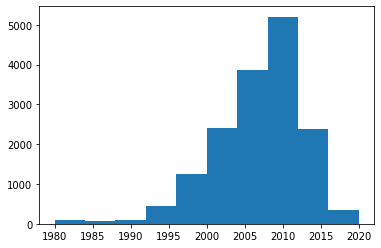

In [63]:
plt.hist(df_clean_year.Year);

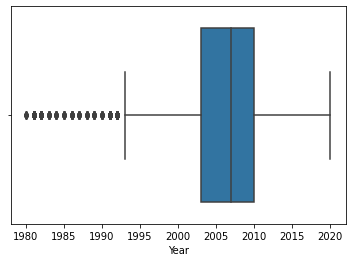

In [88]:
sns.boxplot(x=df_clean_year.Year);

In [93]:
len(df_clean_year[df_clean_year.Year <= 1990]) / len(df_clean_year[df_clean_year.Year > 1990])

0.013754553448059289

In [64]:
df_clean_year.Year.describe()

count    16141.000000
mean      2006.406356
std          5.830780
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [65]:
df_clean = df_clean_year

In [67]:
df_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16141.000000,16141.000000,16141.000000,16141.000000,16141.000000
mean,2006.406356,0.265156,0.147319,0.077951,0.048224
std,5.830780,0.822621,0.508480,0.306771,0.189939
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


sales 이상치 확인

na sales 이상치 확인

In [77]:
df_clean_sales = df_clean.copy()

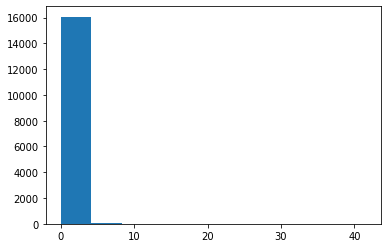

In [78]:
plt.hist(df_clean_sales.NA_Sales);

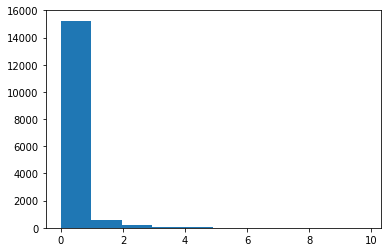

In [80]:
plt.hist(df_clean_sales.NA_Sales[df_clean_sales.NA_Sales < 10]);

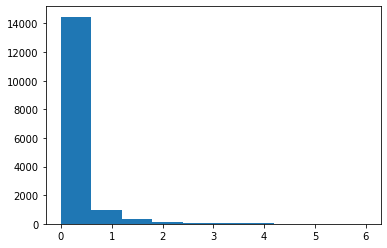

In [81]:
plt.hist(df_clean_sales.NA_Sales[df_clean_sales.NA_Sales < 6]);

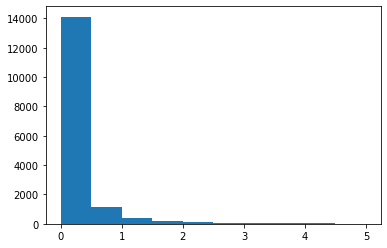

In [82]:
plt.hist(df_clean_sales.NA_Sales[df_clean_sales.NA_Sales < 5]);

In [83]:
len(df_clean_sales.NA_Sales[df_clean_sales.NA_Sales > 5]), len(df_clean_sales.NA_Sales[df_clean_sales.NA_Sales <=5])

(55, 16086)

In [84]:
len(df_clean_sales.NA_Sales[df_clean_sales.NA_Sales > 5]) / len(df_clean_sales.NA_Sales[df_clean_sales.NA_Sales <=5])

0.0034191222180778315

In [85]:
df_clean_sales = df_clean_sales.drop(index = df_clean_sales[df_clean_sales.NA_Sales > 5].index)

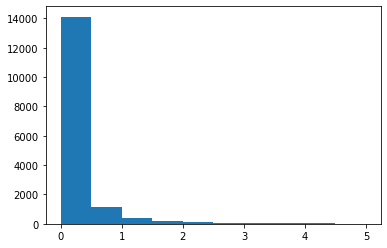

In [86]:
plt.hist(df_clean_sales.NA_Sales);

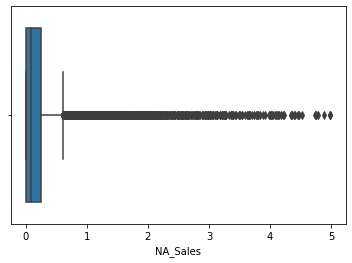

In [87]:
import seaborn as sns

sns.boxplot(x=df_clean_sales.NA_Sales);

In [94]:
len(df_clean_sales[df_clean_sales.NA_Sales > 1]) / len(df_clean_sales[df_clean_sales.NA_Sales <= 1])

0.053576106890227924

eu sales 이상치 확인

In [95]:
df_clean_sales.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16086.000000,16086.000000,16086.000000,16086.000000,16086.000000
mean,2006.417319,0.232280,0.130855,0.071159,0.043186
std,5.816046,0.462542,0.340377,0.250092,0.133016
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000
max,2020.000000,4.990000,9.260000,5.330000,7.530000


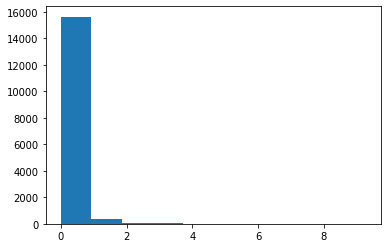

In [96]:
plt.hist(df_clean_sales.EU_Sales);

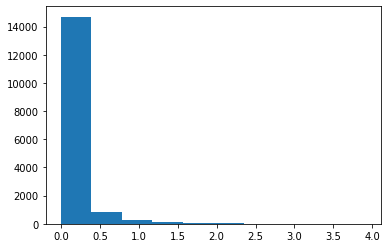

In [99]:
plt.hist(df_clean_sales.EU_Sales[df_clean_sales.EU_Sales < 4]);

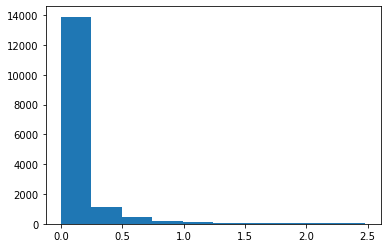

In [100]:
plt.hist(df_clean_sales.EU_Sales[df_clean_sales.EU_Sales < 2.5]);

In [101]:
len(df_clean_sales.EU_Sales[df_clean_sales.EU_Sales > 2.5]) / len(df_clean_sales.NA_Sales[df_clean_sales.NA_Sales <= 2.5])

0.003137353328731882

In [102]:
df_clean_sales = df_clean_sales.drop(index = df_clean_sales[df_clean_sales.EU_Sales > 2.5].index)

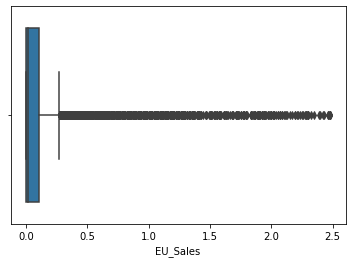

In [103]:
sns.boxplot(x=df_clean_sales.EU_Sales);

JP_Sales 이상치 확인

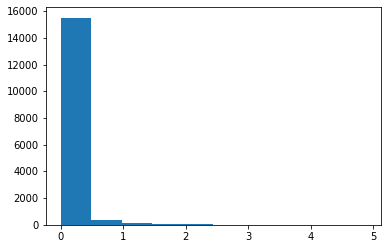

In [104]:
plt.hist(df_clean_sales.JP_Sales);

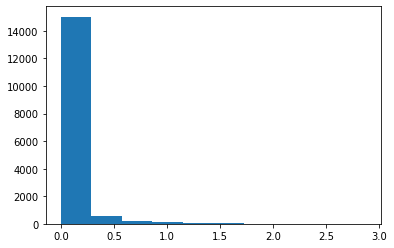

In [105]:
plt.hist(df_clean_sales.JP_Sales[df_clean_sales.JP_Sales < 3]);

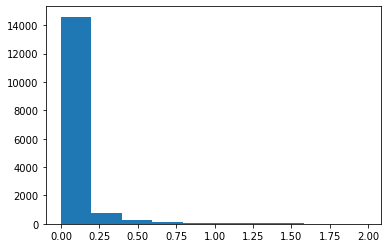

In [106]:
plt.hist(df_clean_sales.JP_Sales[df_clean_sales.JP_Sales < 2.0]);

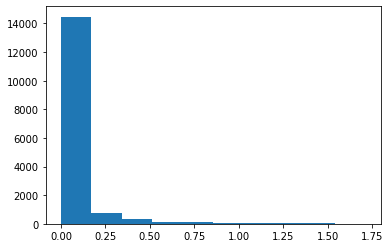

In [107]:
plt.hist(df_clean_sales.JP_Sales[df_clean_sales.JP_Sales < 1.75]);

In [108]:
len(df_clean_sales.JP_Sales[df_clean_sales.JP_Sales > 1.75]) / len(df_clean_sales.JP_Sales[df_clean_sales.JP_Sales <= 1.75])

0.003504380475594493

In [109]:
df_clean_sales = df_clean_sales.drop(index = df_clean_sales[df_clean_sales.JP_Sales > 1.75].index)

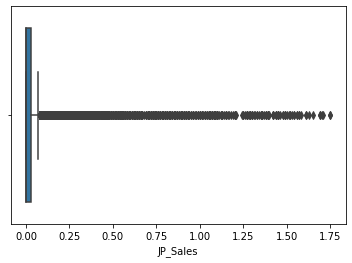

In [110]:
sns.boxplot(x=df_clean_sales.JP_Sales);

Other_Sales 이상치 확인

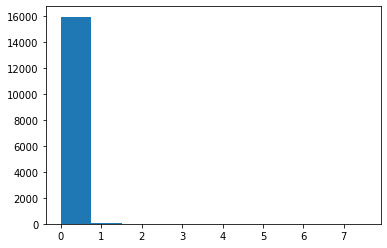

In [111]:
plt.hist(df_clean_sales.Other_Sales);

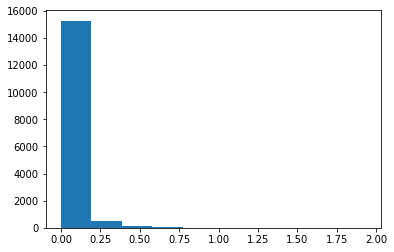

In [112]:
plt.hist(df_clean_sales.Other_Sales[df_clean_sales.Other_Sales < 2]);

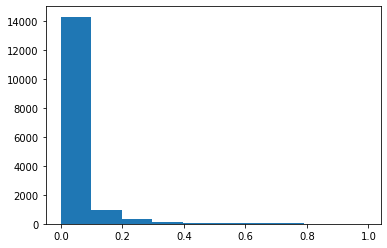

In [113]:
plt.hist(df_clean_sales.Other_Sales[df_clean_sales.Other_Sales < 1.0]);

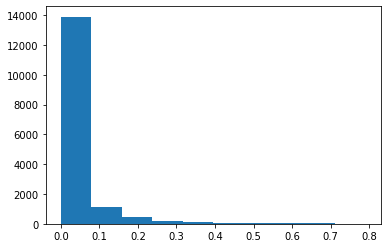

In [114]:
plt.hist(df_clean_sales.Other_Sales[df_clean_sales.Other_Sales < 0.8]);

In [115]:
len(df_clean_sales.Other_Sales[df_clean_sales.Other_Sales > 0.8]) / len(df_clean_sales.Other_Sales[df_clean_sales.Other_Sales <= 0.8])

0.002446521548209021

In [116]:
df_clean_sales = df_clean_sales.drop(index = df_clean_sales[df_clean_sales.Other_Sales > 0.8].index)

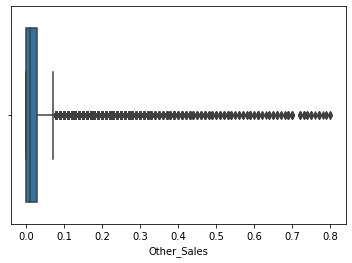

In [117]:
sns.boxplot(x=df_clean_sales.Other_Sales);

In [118]:
df_clean = df_clean_sales

# Misson 1. 지역에 따라서 선호하는 게임 장르가 다를까

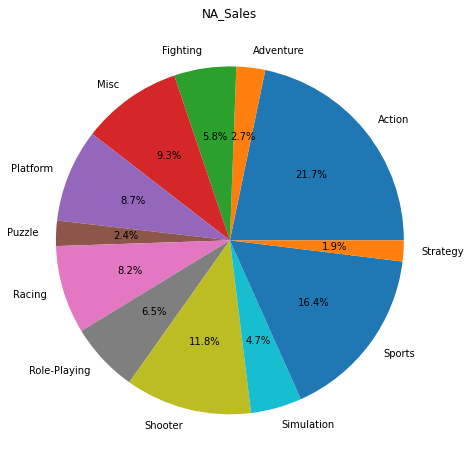

In [125]:
plt.figure(figsize=(8,8))
plt.pie(df_clean.groupby('Genre')['NA_Sales'].sum(), labels=df_clean.groupby('Genre')['NA_Sales'].sum().index, autopct='%.1f%%')
plt.title('NA_Sales')
plt.show();

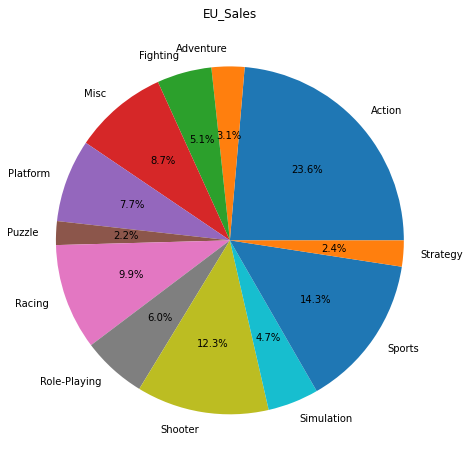

In [126]:
plt.figure(figsize=(8,8))
plt.pie(df_clean.groupby('Genre')['EU_Sales'].sum(), labels=df_clean.groupby('Genre')['EU_Sales'].sum().index, autopct='%.1f%%')
plt.title('EU_Sales')
plt.show();

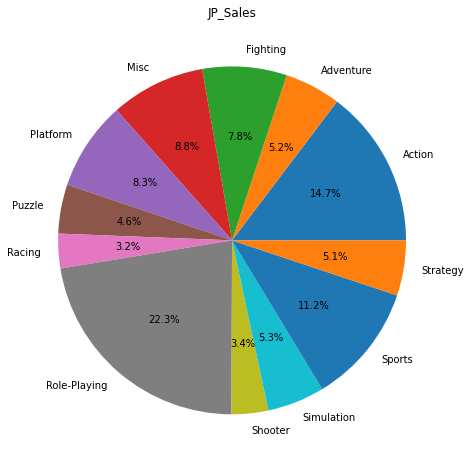

In [124]:
plt.figure(figsize=(8,8))
plt.pie(df_clean.groupby('Genre')['JP_Sales'].sum(), labels=df_clean.groupby('Genre')['JP_Sales'].sum().index, autopct='%.1f%%')
plt.title('JP_Sales')
plt.show();

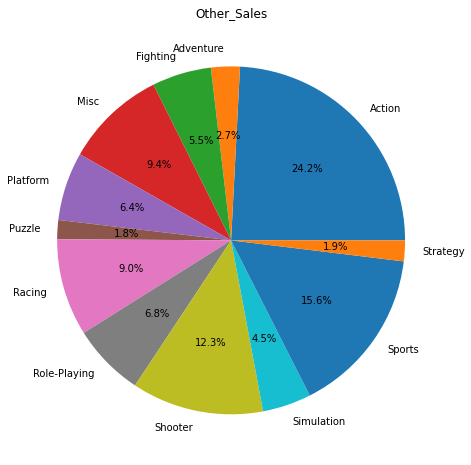

In [127]:
plt.figure(figsize=(8,8))
plt.pie(df_clean.groupby('Genre')['Other_Sales'].sum(), labels=df_clean.groupby('Genre')['Other_Sales'].sum().index, autopct='%.1f%%')
plt.title('Other_Sales')
plt.show();

# Misson 2. 연도별 게임의 트렌드가 있을까 (미완성)

In [ ]:
# 1980년대
# 1990년대
# 2000년대
# 2010년대
# 2020년

In [129]:
df_clean.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6095,Mass Effect 3,WiiU,2012,Role-Playing,Electronic Arts,0.14,0.11,0.00,0.02
11609,Ducati World Racing Challenge,PS,2001,Racing,Acclaim Entertainment,0.02,0.01,0.00,0.00
6495,The Sims: Hot Date,PC,2001,Simulation,Electronic Arts,1.81,0.00,0.00,0.00
11408,Teenage Mutant Ninja Turtles (3DS),3DS,2013,Action,Activision,0.01,0.00,0.00,0.00
2000,Aibou DS,DS,2009,Adventure,Tecmo Koei,0.00,0.00,0.08,0.00
13885,Medabots 9: Metabee / Rokusho,3DS,2015,Role-Playing,Rocket Company,0.00,0.00,0.03,0.00
15232,Super Bowling,N64,1999,Sports,Athena,0.02,0.00,0.00,0.00
16010,Unsolved Crimes,DS,2008,Adventure,Empire Interactive,0.04,0.01,0.00,0.00
6914,True Swing Golf,DS,2005,Sports,Nintendo,0.11,0.00,0.04,0.01
7363,Momotarou Dentetsu Happy,SNES,1996,Misc,Hudson Soft,0.00,0.00,0.32,0.00


In [130]:
df_clean.Year.describe()

count    15941.000000
mean      2006.431278
std          5.788991
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [156]:
df_trend_by_year = df_clean.groupby(['Year', 'Genre']).size().reset_index().rename(columns={0:'Amount'})
df_trend_by_year

,Year,Genre,Amount
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1981,Action,25
...,...,...,...
379,2016,Sports,36
380,2016,Strategy,10
381,2017,Action,1
382,2017,Role-Playing,2


# Misson 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [131]:
df_clean['Total_Sales'] = df_clean[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [137]:
df_rank_by_sales = df_clean.sort_values('Total_Sales', ascending = False).reset_index(drop=True)
df_rank_by_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Mario Party 8,Wii,2007,Misc,Nintendo,3.81,2.30,1.58,0.73,8.42
1,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70
2,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
3,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.57
4,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.00,0.69,7.38
...,...,...,...,...,...,...,...,...,...,...
15936,Duel Masters: Shadow of the Code,GBA,2004,Misc,Atari,0.01,0.00,0.00,0.00,0.01
15937,Builder's Block,PS,1999,Strategy,EON Digital Entertainment,0.01,0.00,0.00,0.00,0.01
15938,Dungeons - The Dark Lord,PC,2011,Strategy,Kalypso Media,0.00,0.01,0.00,0.00,0.01
15939,Aquaman: Battle for Atlantis,GC,2003,Action,TDK Mediactive,0.01,0.00,0.00,0.00,0.01


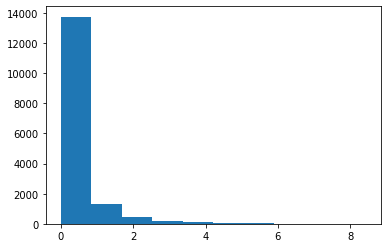

In [134]:
plt.hist(df_rank_by_sales.Total_Sales);

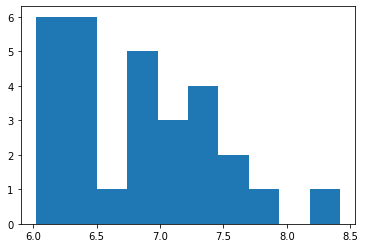

In [135]:
plt.hist(df_rank_by_sales.Total_Sales[df_rank_by_sales.Total_Sales > 6]);

In [ ]:
# 출고량이 높은 게임의 장르/연도/플랫폼/퍼블리셔

In [141]:
df_popular_genre = pd.DataFrame(df_rank_by_sales[df_rank_by_sales.Total_Sales > 6].groupby('Genre').size()).rename(columns={0:'Amount'}).reset_index()
df_popular_genre

,Genre,Amount
0,Action,6
1,Fighting,2
2,Misc,2
3,Platform,7
4,Racing,2
5,Role-Playing,1
6,Shooter,8
7,Sports,1


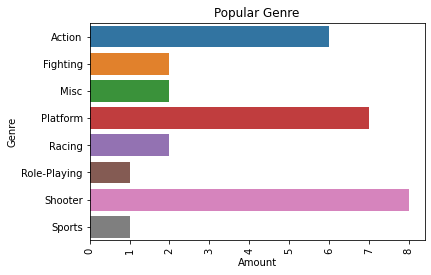

In [150]:
sns.barplot(y='Genre', x='Amount', data=df_popular_genre)
plt.xticks(rotation=90)
plt.title("Popular Genre")
plt.show();

In [144]:
df_popular_platform = pd.DataFrame(df_rank_by_sales[df_rank_by_sales.Total_Sales > 6].groupby('Platform').size()).rename(columns={0:'Amount'}).reset_index()
df_popular_platform

,Platform,Amount
0,GC,3
1,GEN,1
2,N64,1
3,NES,1
4,PS,5
5,PS2,2
6,Wii,5
7,WiiU,1
8,X360,8
9,XB,1


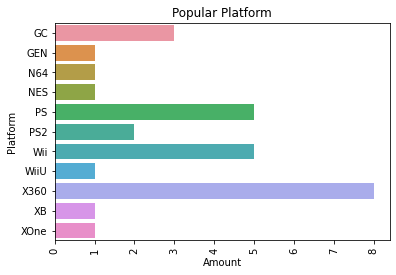

In [151]:
sns.barplot(y='Platform', x='Amount', data=df_popular_platform)
plt.xticks(rotation=90)
plt.title("Popular Platform")
plt.show();

In [147]:
df_popular_publisher = pd.DataFrame(df_rank_by_sales[df_rank_by_sales.Total_Sales > 6].groupby('Publisher').size()).rename(columns={0:'Amount'}).reset_index()
df_popular_publisher

,Publisher,Amount
0,Activision,2
1,Electronic Arts,1
2,Konami Digital Entertainment,2
3,Microsoft Game Studios,6
4,Nintendo,10
5,Sega,1
6,Sony Computer Entertainment,5
7,Take-Two Interactive,1
8,Ubisoft,1


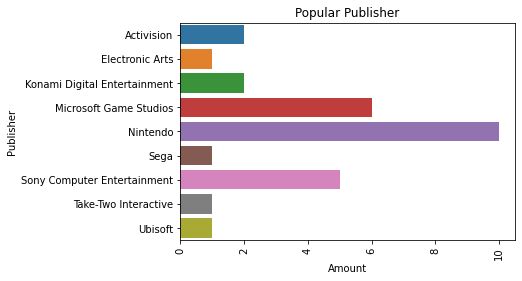

In [152]:
sns.barplot(y='Publisher', x='Amount', data=df_popular_publisher)
plt.xticks(rotation=90)
plt.title("Popular Publisher")
plt.show();

In [153]:
df_popular_year = pd.DataFrame(df_rank_by_sales[df_rank_by_sales.Total_Sales > 6].groupby('Year').size()).rename(columns={0:'Amount'}).reset_index()
df_popular_year

,Year,Amount
0,1986,1
1,1992,1
2,1996,1
3,1997,1
4,1998,4
5,2001,3
6,2002,2
7,2003,1
8,2006,2
9,2007,1


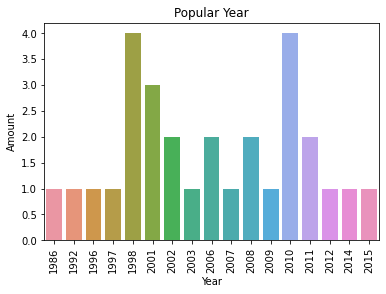

In [155]:
sns.barplot(x='Year', y='Amount', data=df_popular_year)
plt.xticks(rotation=90)
plt.title("Popular Year")
plt.show();